# Example of a simple neural network

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# Network Architecture
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
# To make network ready for training we need to pick three more things
# 1. loss function
# 2. Optimizer
# 3. Metric
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Before training we need to reshape it into the shape the network expects and scaling it so that all values lie between 0 and 1
# preparing image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
# We need to categorically encode the labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
# Train the model
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2616 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1048 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0686 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0372 - accuracy: 0.9890


In [13]:
# check on test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9783
test_accuracy:  0.9782999753952026


# Neural Network basics

In [14]:
# Scalars / 0D tensors
import numpy as np
x = np.array(12)
x

array(12)

In [15]:
x.ndim

0

In [16]:
# Vectors / 1D tensors
x = np.array([12, 3, 5, 13])
x

array([12,  3,  5, 13])

In [17]:
x.ndim

1

In [18]:
# Matrices / 2D tensors
x = np.arange(0,9)
x = x.reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
x.ndim

2

In [20]:
x = np.arange(0,27)
x = x.reshape(3,3,3)
x

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [21]:
x.ndim

3

In [22]:
# Another look at the dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
print(train_images.shape)

(60000, 28, 28)


In [24]:
print(train_images.ndim)

3


In [25]:
print(train_images.dtype)

uint8


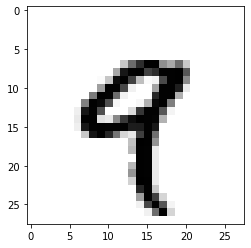

In [26]:
# displaying the fourth digit
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
# manipulating tensors in numpy
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [29]:
# more detailed notation
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [30]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [31]:
my_slice = train_images[: , 14:, 14:]

In [32]:
my_slice = train_images[:, 7:-7, 7:-7]